6v6a.json processed. Max score: 11.0
3oz6.json processed. Max score: 11.0
8ztc.json processed. Max score: 11.0


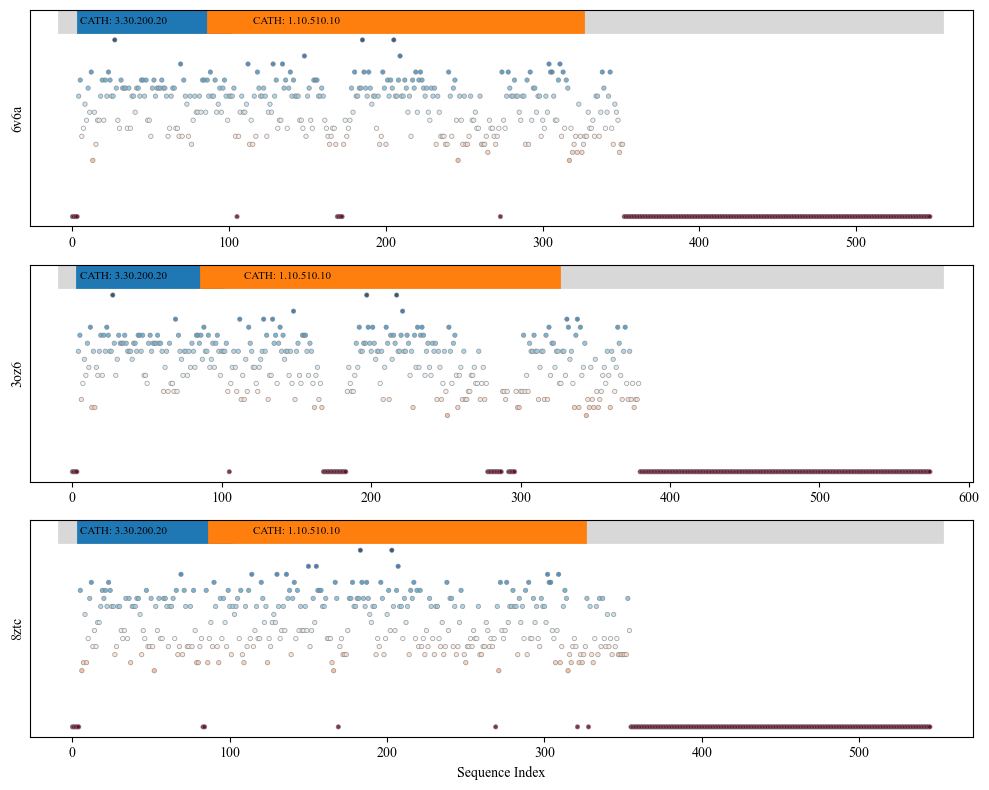

In [14]:
import os
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from Bio.Align import substitution_matrices
from matplotlib import rcParams  
rcParams['font.family'] = 'Times New Roman'
blosum62 = substitution_matrices.load("BLOSUM62")
GAP_PENALTY = -11  

metadata_all = ['6v6a.json', '3oz6.json', '8ztc.json']


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 8)) 
j = 0
scores = {}
for metadata in metadata_all:
    label = re.search(r'(.+)\.json', metadata).group(1)
    with open(os.path.join('metadata', metadata), 'r', encoding='utf-8') as file:
        data = json.load(file)
        chain = list(data['targets'][0]['templates'])[0]['chain']
        template = data['targets'][0]['templates'][0]['tpl_seq']
        tgt = data['targets'][0]['templates'][0]['trg_seq']
        
        score = []

        for i in range(len(template)):
            aa1 = template[i]
            aa2 = tgt[i]
            
            if aa1 == '-' or aa2 == '-':
                score.append(GAP_PENALTY)
            else:
                
                try:
                    
                    val = blosum62[aa1][aa2]
                    score.append(val)
                except KeyError:
                    
                    score.append(-1)
        scores[label] = score

    print(f"{metadata} processed. Max score: {max(score)}")
    
    y = np.array(score).reshape(1, -1)
    

    ax[j].scatter(
        np.arange(len(tgt)), 
        np.array(score).reshape(1, -1), 
        c=y, 
        cmap='RdBu', 
        s=10, 
        alpha=0.8, 
        edgecolor = 'grey', 
        linewidth = 0.5
    )
    
    domain1 = np.arange(12, 94)
    domain2 = np.arange(95, 319)
    
    max_score = np.max(score)
    bar_height = max_score + 2.5 
    
    linewidth = 20 
    
    ax[j].plot(
        np.arange(len(tgt)), 
        np.array(bar_height).repeat(len(tgt)), 
        linewidth=linewidth, 
        color='grey',
        alpha=0.3
    )
    
    ax[j].plot(
        domain1, 
        np.array(bar_height).repeat(len(domain1)), 
        linewidth=linewidth, 
        label='Phosphorylase kinase domain 1'
    )
    
    ax[j].plot(
        domain2, 
        np.array(bar_height).repeat(len(domain2)), 
        linewidth=linewidth, 
        label='Transferase domain 1'
    )
    
    ax[j].set_yticks([]) 
    ax[j].set_ylabel(label)
    

    ax[j].text(5, bar_height-0.5 , 'CATH: 3.30.200.20', {'size': 8})
    ax[j].text(115, bar_height-0.5 , 'CATH: 1.10.510.10', {'size': 8})
    
    j += 1

plt.xlabel('Sequence Index')
plt.tight_layout() 
plt.savefig('c0verage_blosum.png', dpi =600)

In [4]:
for j in scores:
    seq_range = scores[j][19:42]
    print(sum([i for i in seq_range]),sum([i for i in seq_range if i>0]), len(([i for i in seq_range if i>0])))

96.0 96.0 20
110.0 110.0 23
73.0 79.0 18


In [7]:
scores['8ztc'][19:42]

[6.0,
 5.0,
 6.0,
 4.0,
 7.0,
 6.0,
 4.0,
 4.0,
 -2.0,
 -1.0,
 4.0,
 4.0,
 1.0,
 0.0,
 1.0,
 5.0,
 0.0,
 5.0,
 -3.0,
 4.0,
 4.0,
 4.0,
 5.0]